<b>About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
<b>Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Decision Trees\Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

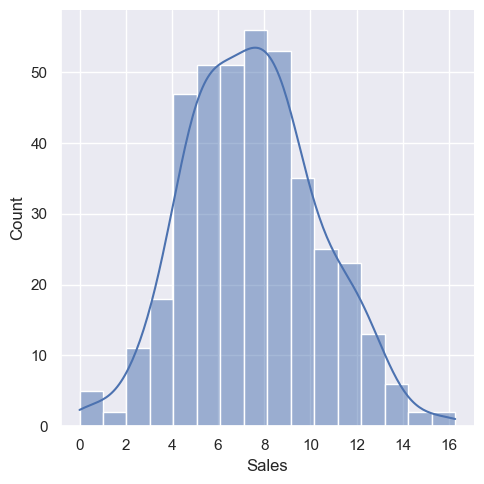

In [7]:
sns.displot(data['Sales'],kde=True)

In [8]:
data_1 = data.copy()
a=[]
for i in data_1['Sales']:
    if i > data_1['Sales'].median():
        a.append('High')
    else:
        a.append('Low')
a

['High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Hig

In [9]:
data_1['Sales'] = a

In [10]:
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


<Figure size 1600x1200 with 0 Axes>

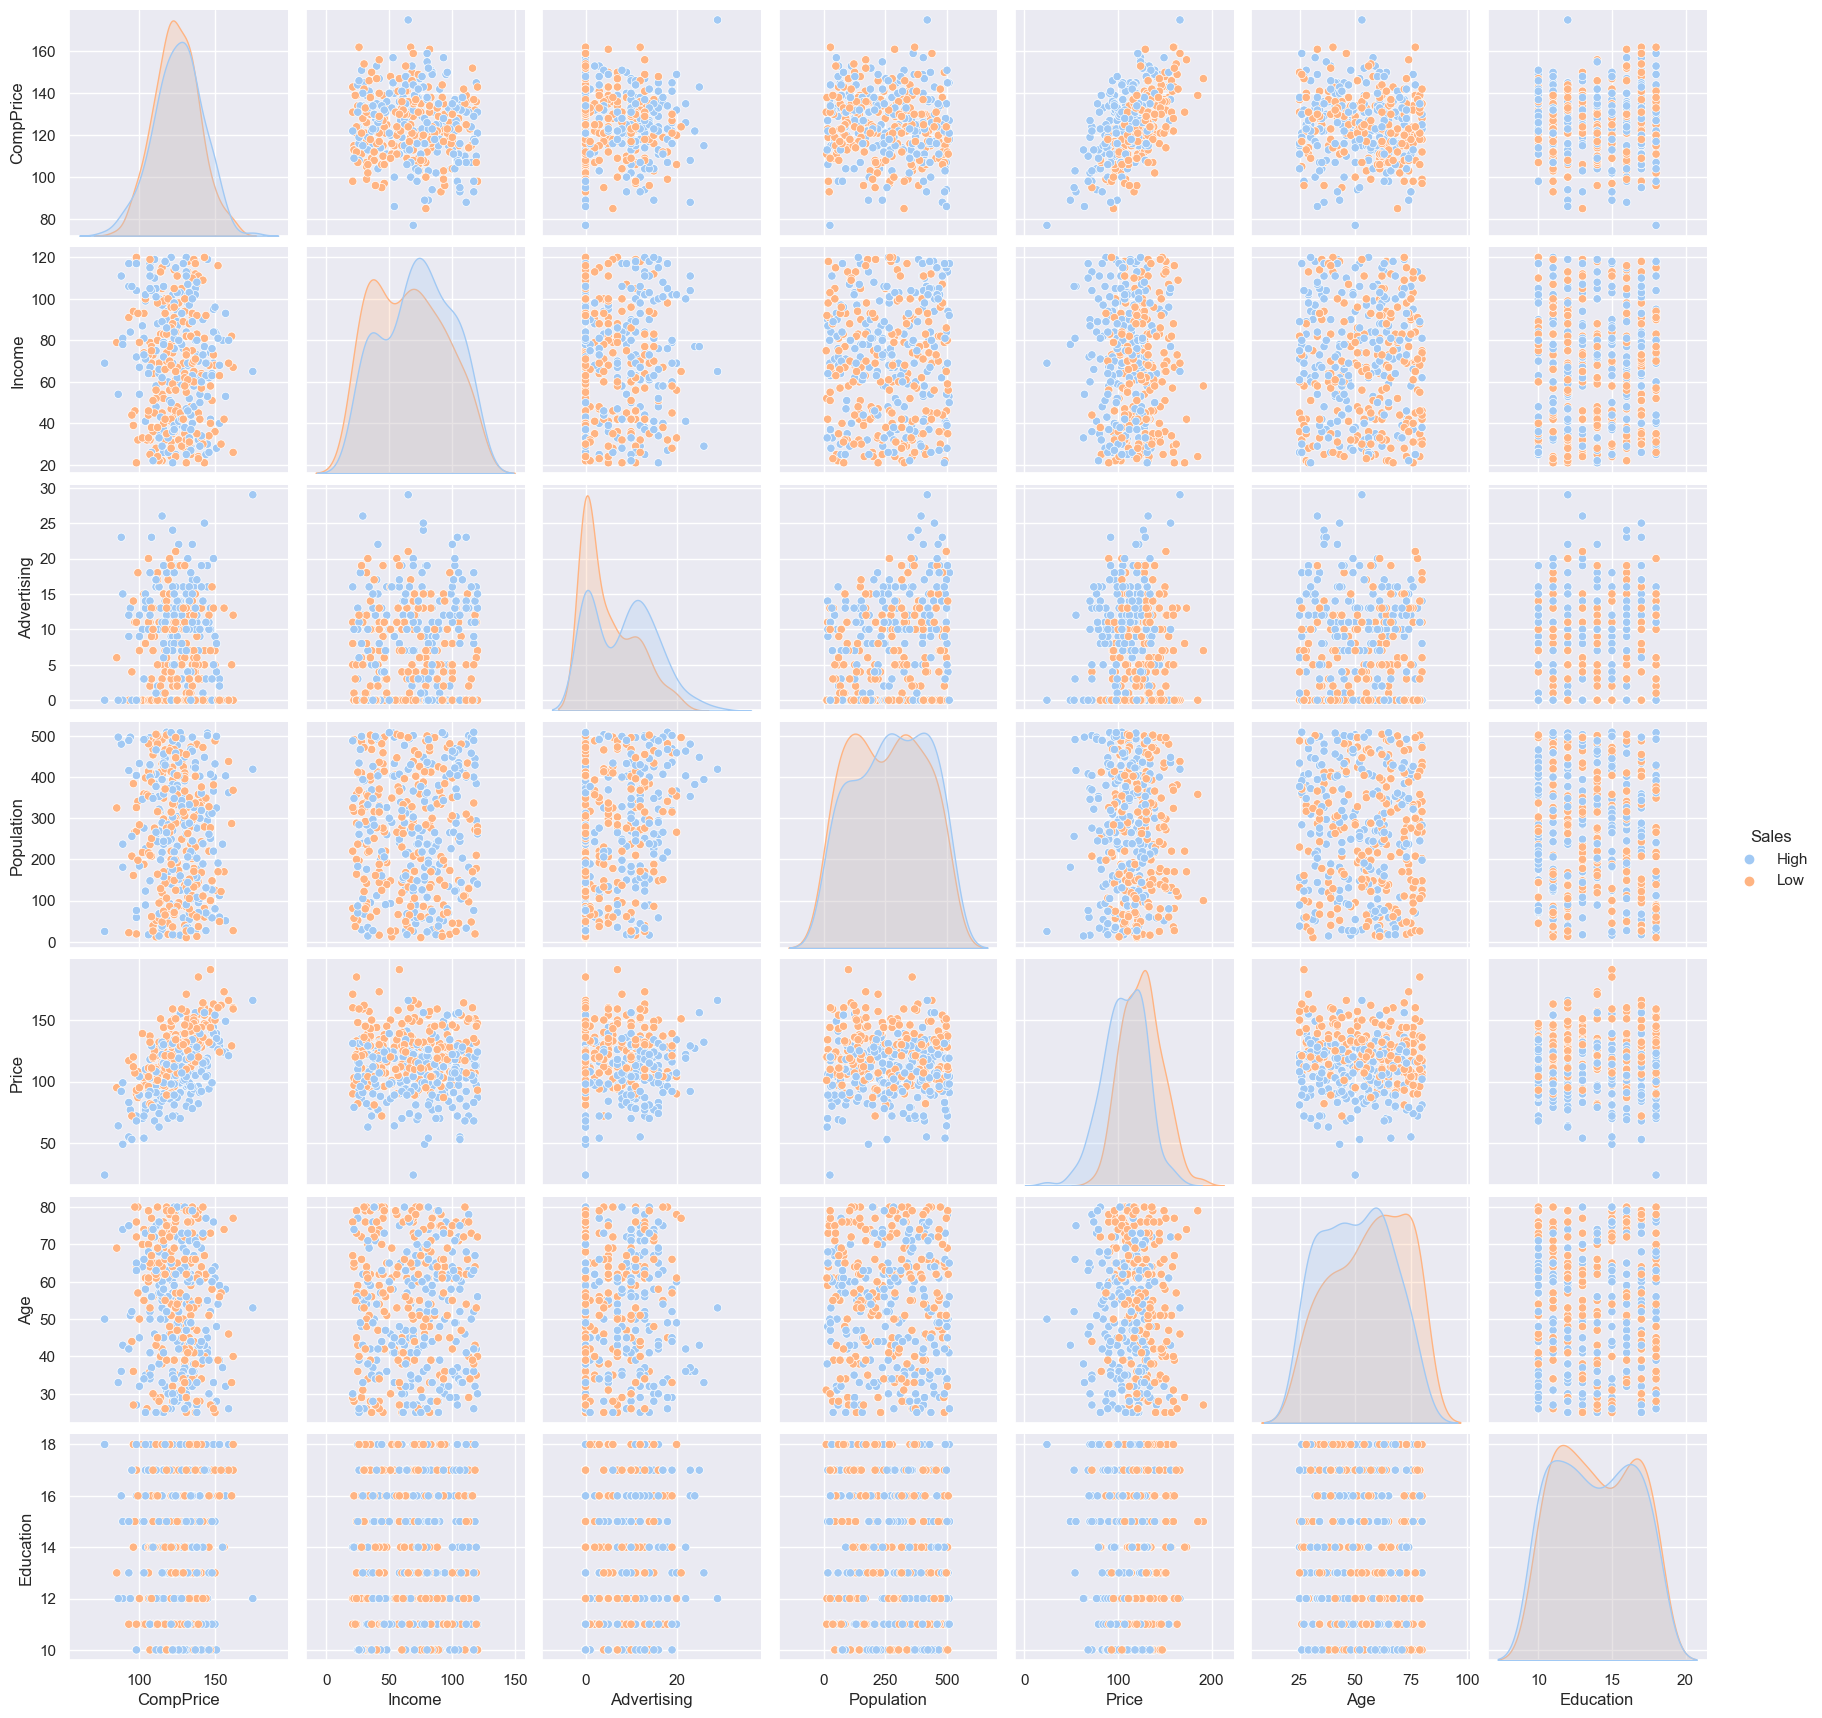

In [11]:
plt.figure(dpi=250)
sns.pairplot(data_1,hue="Sales",palette='pastel')
plt.show()

C:\Users\CSC\AppData\Local\Temp\ipykernel_6544\926810834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


<Axes: >

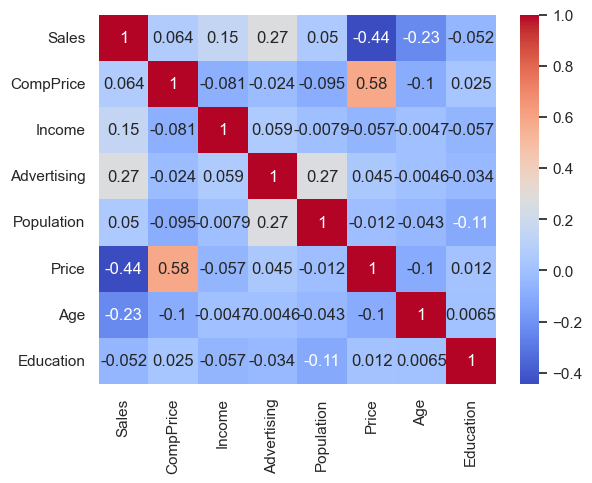

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

<Axes: >

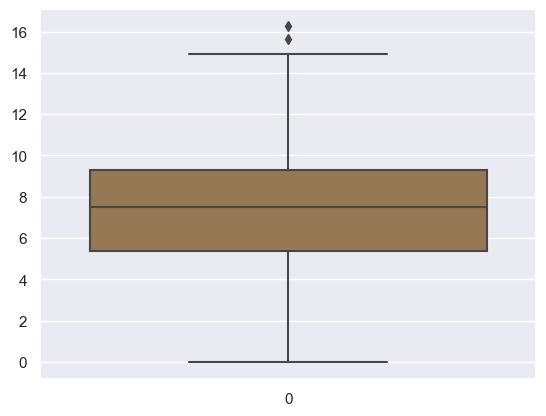

In [13]:
sns.boxplot(data['Sales'],palette="cubehelix")

<b>Since Classification models are not effected by outliers we can ignore them

<Axes: xlabel='Sales', ylabel='count'>

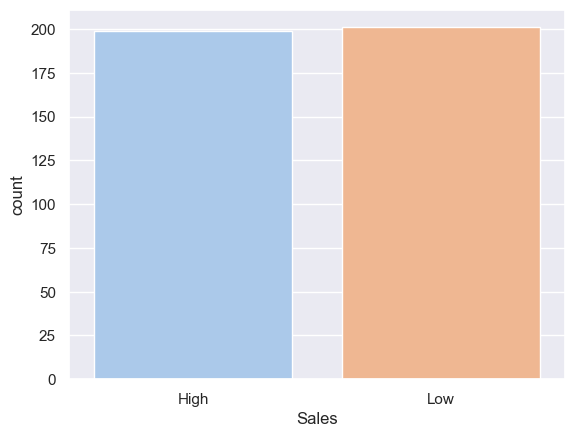

In [14]:
sns.countplot(x='Sales',data=data_1,palette='pastel')

In [15]:
#Let's convert all the categorical variables into numerical
cat_var = pd.get_dummies(data[['Urban','US']])
cat_var

,Urban_No,Urban_Yes,US_No,US_Yes
0,0,1,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,1,0
...,...,...,...,...
395,0,1,0,1
396,1,0,0,1
397,0,1,0,1
398,0,1,0,1


In [16]:
data_3 = pd.concat([data_1,cat_var],axis=1)
data_3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,0,1
1,High,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0,1
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1,0,1
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1,0,1
4,Low,141,64,3,340,128,Bad,38,13,Yes,No,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes,0,1,0,1
396,Low,139,23,3,37,120,Medium,55,11,No,Yes,1,0,0,1
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes,0,1,0,1
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes,0,1,0,1


In [17]:
data_4 = data_3.copy()
data_4

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,0,1
1,High,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0,1
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1,0,1
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1,0,1
4,Low,141,64,3,340,128,Bad,38,13,Yes,No,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes,0,1,0,1
396,Low,139,23,3,37,120,Medium,55,11,No,Yes,1,0,0,1
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes,0,1,0,1
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes,0,1,0,1


In [18]:
data_4['ShelveLoc'] = data_4['ShelveLoc'].map({'Bad':0,'Medium':1,'Good':2})

In [19]:
data_5 = data_4.drop(['Urban','US'],axis=1)

In [20]:
data_5['ShelveLoc'].unique()

array([0, 2, 1], dtype=int64)

In [21]:
data_5['ShelveLoc'].value_counts()

1    219
0     96
2     85
Name: ShelveLoc, dtype: int64

In [22]:
data_5

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,0,42,17,0,1,0,1
1,High,111,48,16,260,83,2,65,10,0,1,0,1
2,High,113,35,10,269,80,1,59,12,0,1,0,1
3,Low,117,100,4,466,97,1,55,14,0,1,0,1
4,Low,141,64,3,340,128,0,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,2,33,14,0,1,0,1
396,Low,139,23,3,37,120,1,55,11,1,0,0,1
397,Low,162,26,12,368,159,1,40,18,0,1,0,1
398,Low,100,79,7,284,95,0,50,12,0,1,0,1


<b>Model Building

<b>Using Entropy criterion

In [23]:
x = data_5.drop(['Sales'],axis=1)
y = data_5['Sales']

In [24]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [25]:
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
data_5.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No',
       'US_Yes'],
      dtype='object')

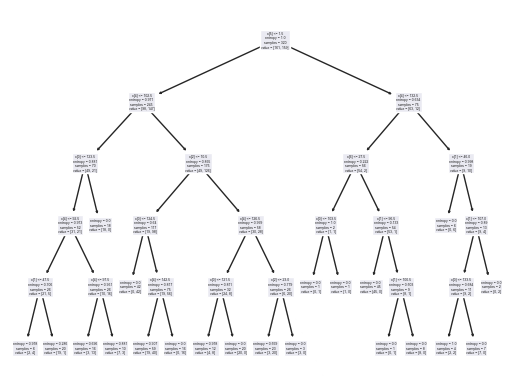

In [27]:
tree.plot_tree(model_1);

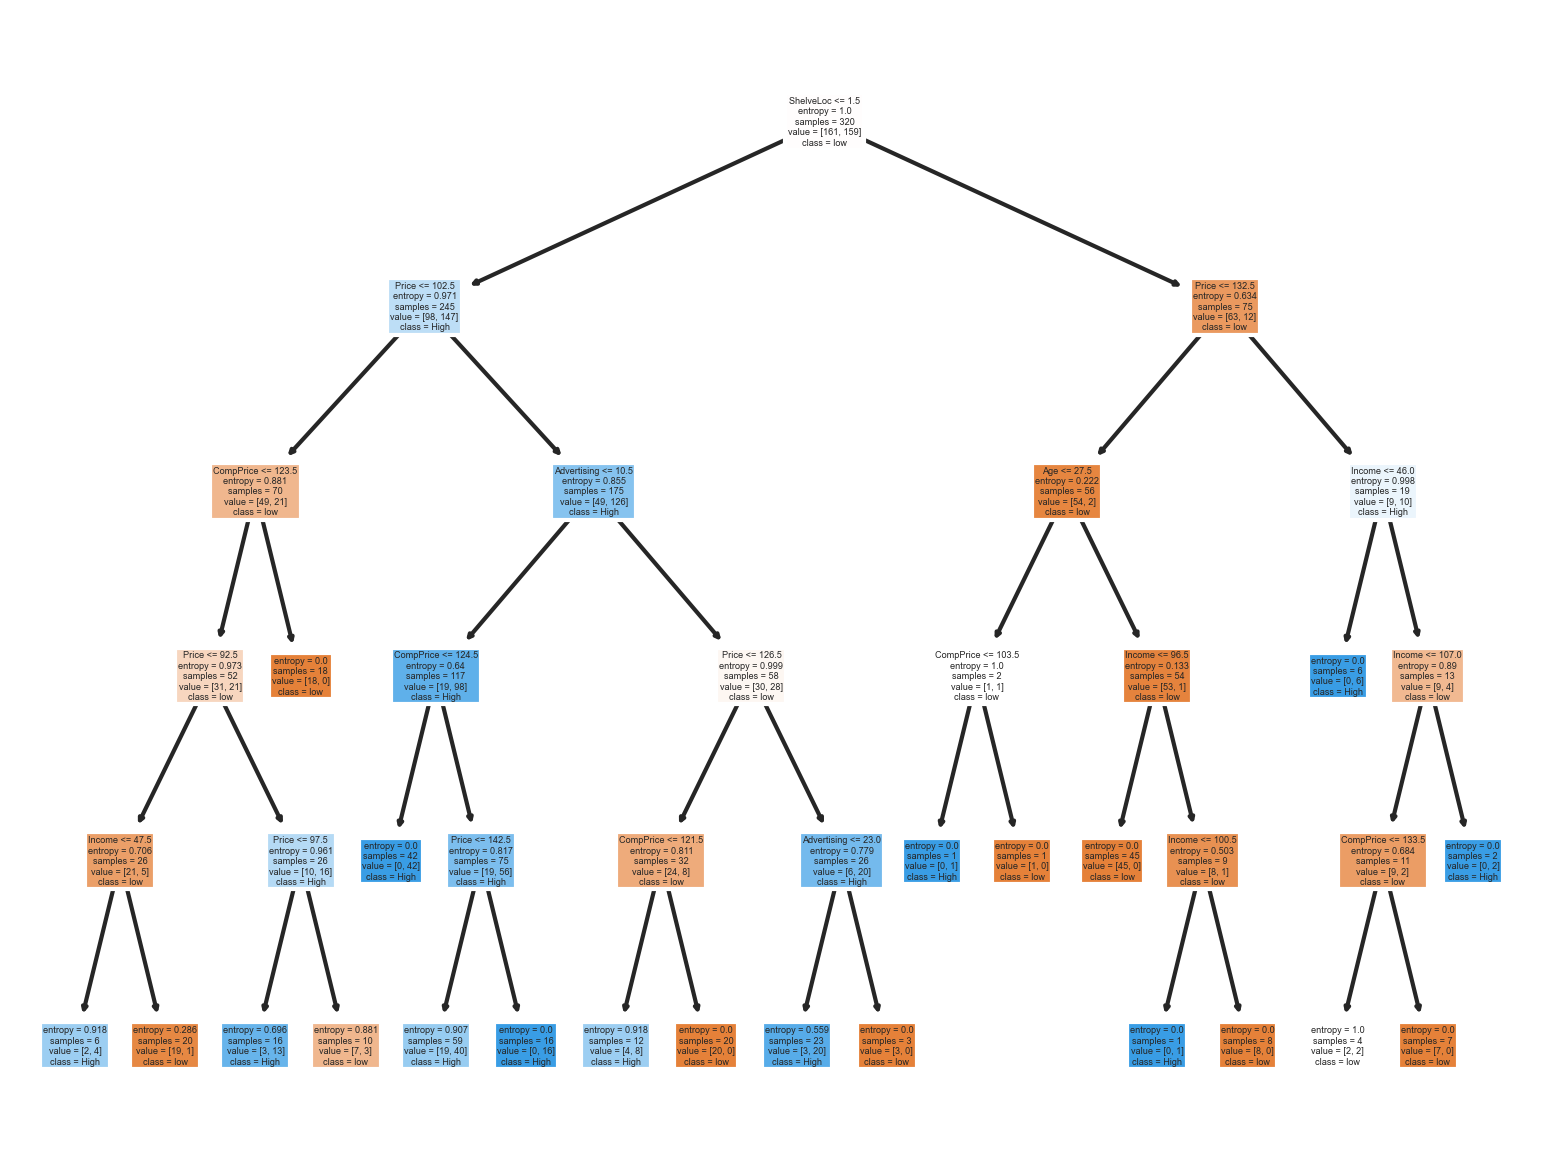

In [28]:
fn = [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No',
       'US_Yes']
cn = ['low','High']
plt.figure(dpi=300)
plot_tree(model_1,feature_names = fn, class_names=cn,filled=True);
plt.show()

In [29]:
y_pred = model_1.predict(x_test)
y_pred

array(['High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'High',
       'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low'],
      dtype=object)

In [30]:
pd.crosstab(y_test,y_pred) 

col_0,High,Low
Sales,,
High,27,11
Low,6,36


In [31]:
model_1.score(x_train,y_train)

0.884375

In [32]:
model_1.score(x_test,y_test)

0.7875

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.82      0.71      0.76        38
         Low       0.77      0.86      0.81        42

    accuracy                           0.79        80
   macro avg       0.79      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80



In [34]:
print(confusion_matrix(y_test,y_pred))

[[27 11]
 [ 6 36]]


In [35]:
from sklearn.preprocessing import LabelEncoder
yt = LabelEncoder().fit_transform(y_test)
yp = LabelEncoder().fit_transform(y_pred)

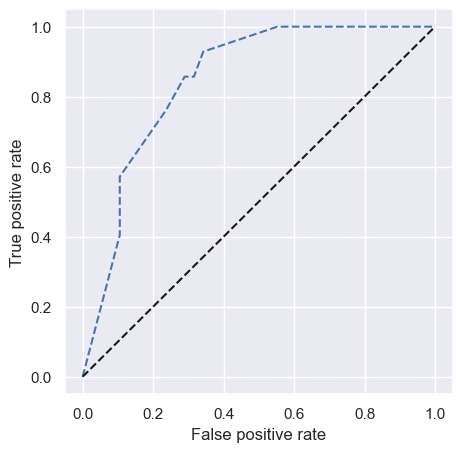

In [36]:
fpr , tpr , threshold = roc_curve(yt,model_1.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [37]:
auc

0.7838345864661654

------------------------------------------------------------------------------------------------------------------------------------

<b>Using Gini criterion

In [38]:
model_2 = DecisionTreeClassifier(criterion="gini",max_depth=5)

In [39]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

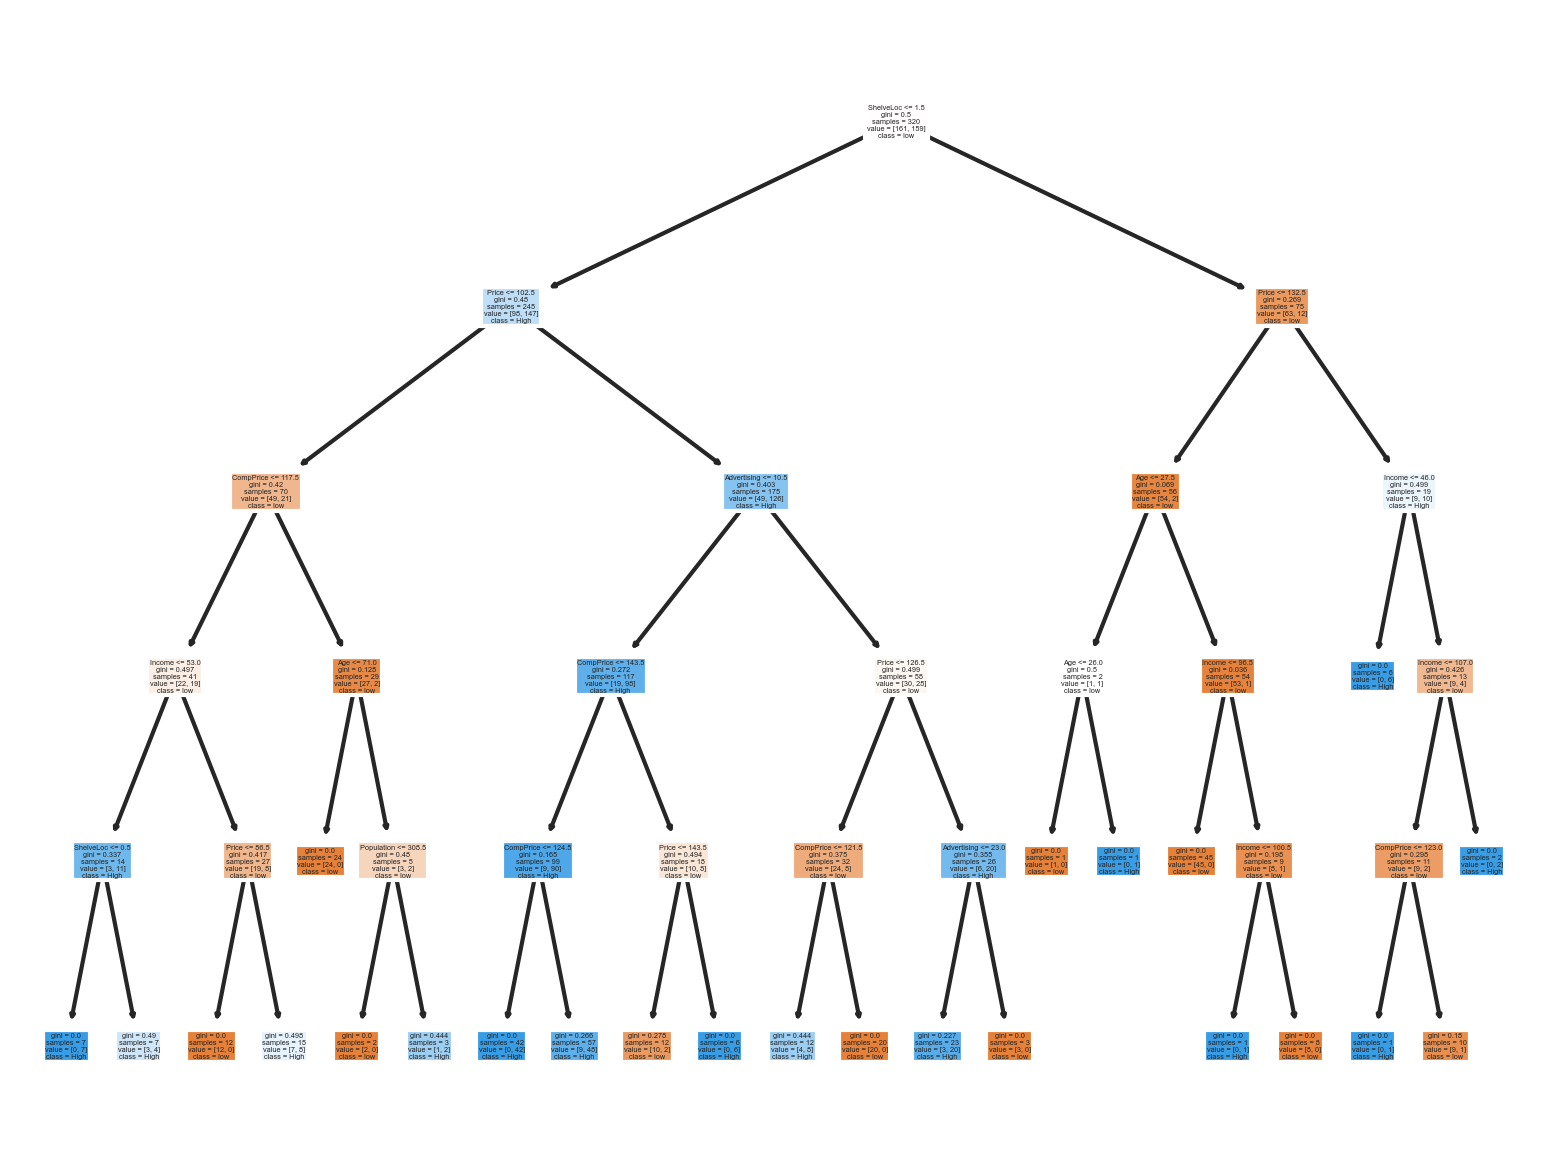

In [40]:
fn = [ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No',
       'US_Yes']
cn = ['low','High']
plt.figure(dpi=300)
plot_tree(model_2,feature_names = fn, class_names=cn,filled=True);
plt.show()

In [41]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

array(['Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low'],
      dtype=object)

In [42]:
print(confusion_matrix(y_test,y_pred_2))

[[24 14]
 [ 4 38]]


In [43]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

        High       0.86      0.63      0.73        38
         Low       0.73      0.90      0.81        42

    accuracy                           0.78        80
   macro avg       0.79      0.77      0.77        80
weighted avg       0.79      0.78      0.77        80



In [45]:
model_2.score(x_train,y_train)

0.90625

In [46]:
model_2.score(x_test,y_test)

0.775

In [48]:
yp2 = LabelEncoder().fit_transform(y_pred_2)

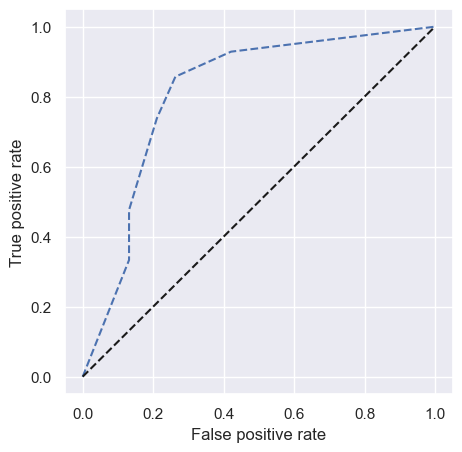

In [52]:
fpr2 , tpr2 ,threshold2 = roc_curve(yt,model_2.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp2)
plt.figure(figsize=(5,5))
plt.plot(fpr2 , tpr2 , color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [53]:
auc

0.7681704260651628

<b>Conclusion
    
<b>Model_1 with Entropy criterion is predicting both 0's amd 1's (i.e. Low and High) with good AUC score<br>
<b>Model_2 with Gini criterion is predicting 0's better than 1's (i.e. Low and High) with satisfactory AUC score
    
    
 <b>Model_1 can be considerd as final model as it has better predictions for both the targets